<a href="https://colab.research.google.com/github/ulfiizza27/2141720052-Machine-Learning-2023/blob/main/Week%208/UTS_26_UlfiMustatiqAbidatulIzza_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Nama                                | No | NIM        |
| ----------------------------------- | -- | ---------- |
| Ulfi Mustatiq Abidatul Izza         | 26 | 2141720052 |

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Library**

In [4]:
import pandas as pd
import cv2 as cv
import numpy as np
from sklearn.metrics import f1_score
from scipy.stats import entropy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow


Dimensions of 1.jpg:
Height: 343
Width: 1183
Channels: 3
Reshaped data shape: (405769, 3)

Dimensions of 5.jpg:
Height: 343
Width: 1233
Channels: 3
Reshaped data shape: (422919, 3)

Dimensions of 3.jpg:
Height: 213
Width: 716
Channels: 3
Reshaped data shape: (152508, 3)

Dimensions of 2.jpg:
Height: 258
Width: 1101
Channels: 3
Reshaped data shape: (284058, 3)

Dimensions of 4.jpg:
Height: 299
Width: 1085
Channels: 3
Reshaped data shape: (324415, 3)


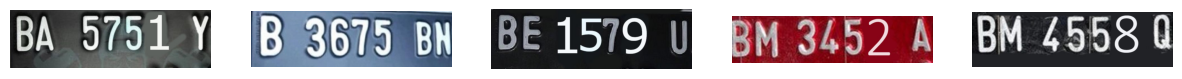

In [37]:
import os

folder_path = '/content/drive/MyDrive/MachineLearning/plat/'

# Dapatkan daftar file citra dalam folder
plat_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

data = []

# Loop melalui daftar file dan baca setiap gambar
for filename in plat_files:
    # Gabungkan path folder dengan nama file
    file_path = os.path.join(folder_path, filename)

    # Baca gambar
    img = cv.imread(file_path)

    if img is not None:
        # Ubah ke format RGB
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        data.append(img_rgb)

        h, w, ch = img_rgb.shape
        print(f"\nDimensions of {filename}:")
        print(f"Height: {h}")
        print(f"Width: {w}")
        print(f"Channels: {ch}")

        img_data = img_rgb / 255.0
        img_data = img_data.reshape(h * w, ch)
        print(f"Reshaped data shape: {img_data.shape}")

# Fungsi untuk menampilkan gambar
def plot_image(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, img in enumerate(images):
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

# Menampilkan gambar
plot_image(data)

## **Scatter Plot**

In [9]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

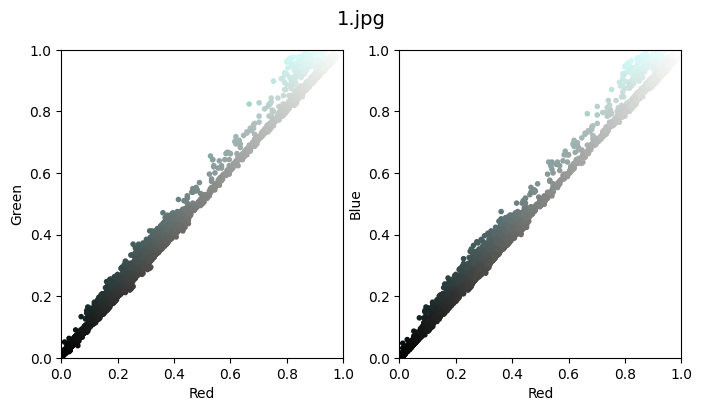

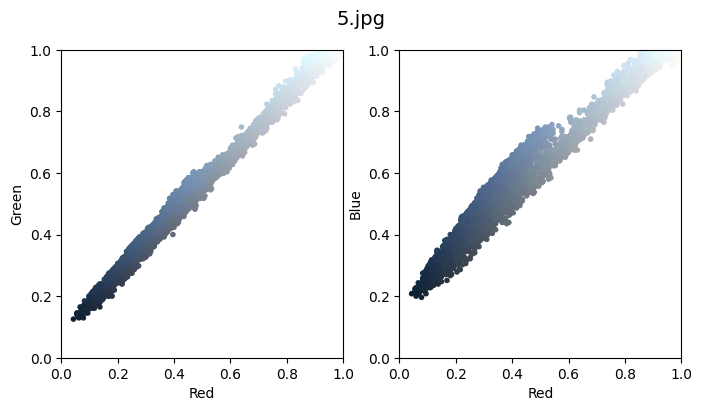

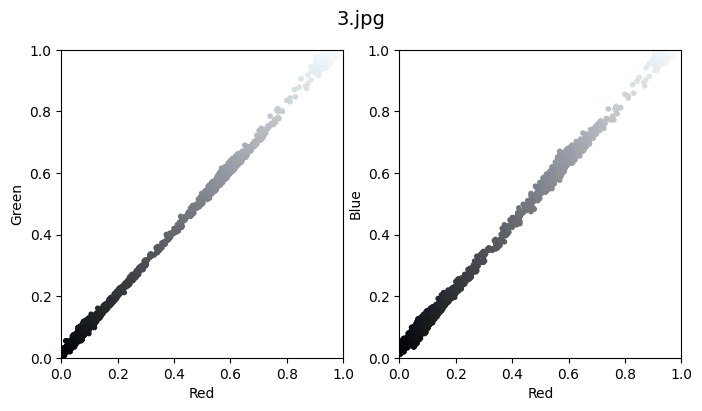

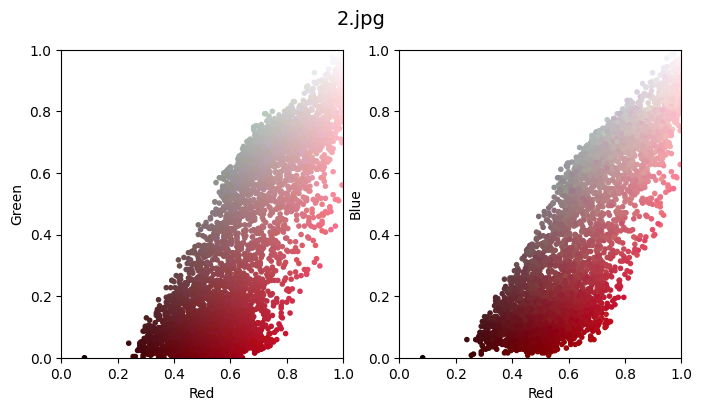

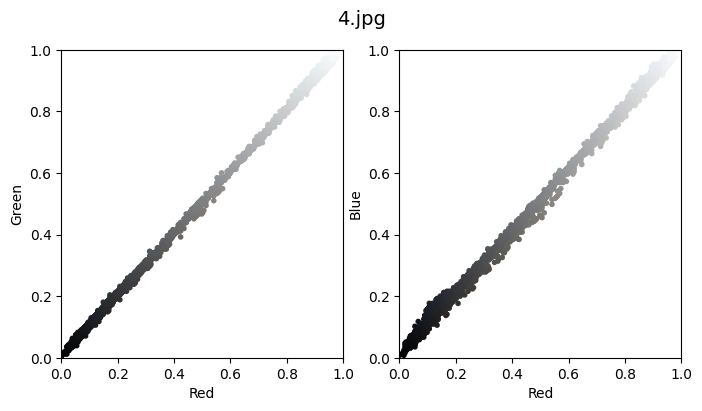

In [17]:
for filename in plat_files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv.imread(file_path)

        if img is not None:
            # Ubah ke format RGB
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            h, w, ch = img_rgb.shape
            img_data = img_rgb / 255.0
            img_data = img_data.reshape(h * w, ch)
            plot_pixels(img_data, title=filename)
plt.show()


## **K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

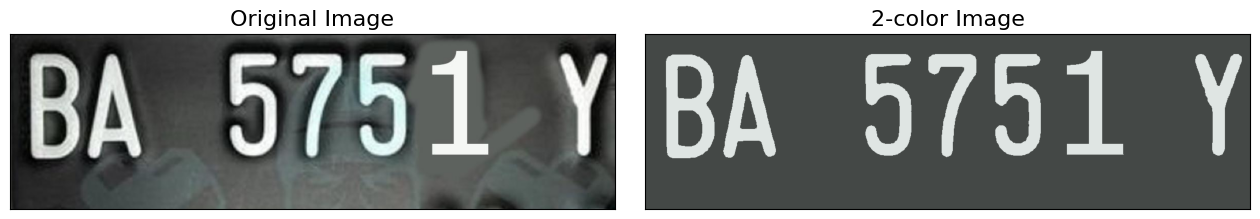

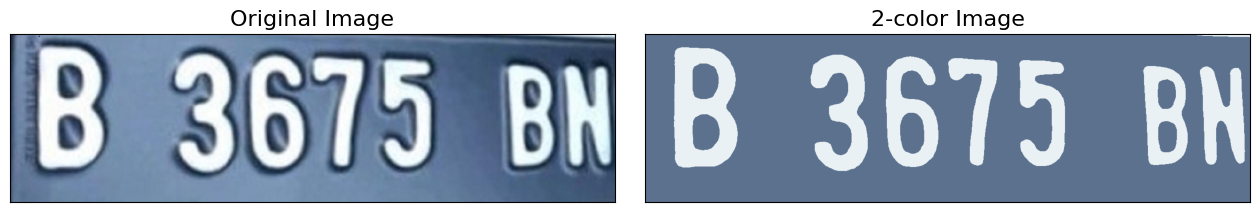

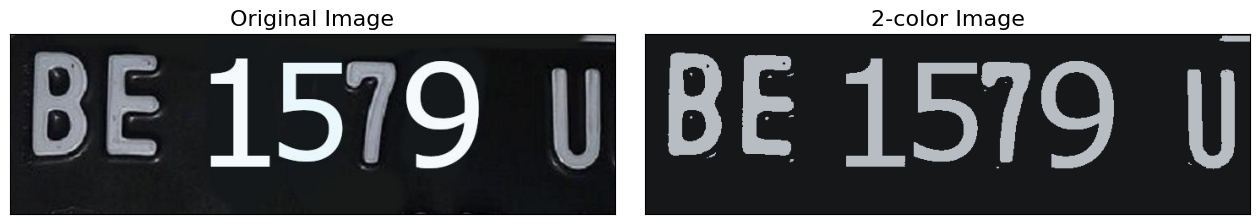

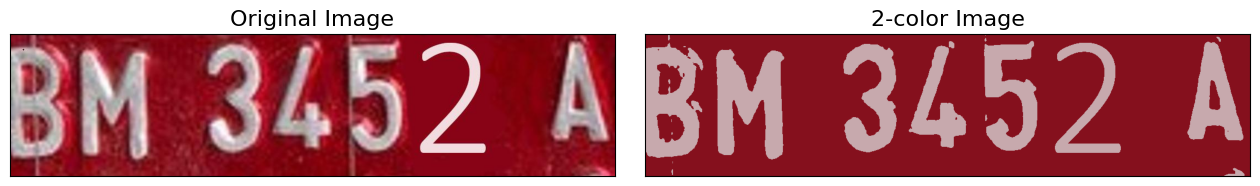

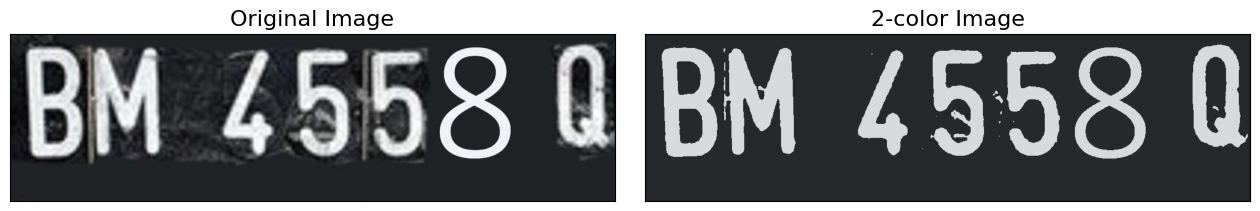

In [36]:
from sklearn.cluster import KMeans

# Terapkan K-Means
for filename in plat_files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv.imread(file_path)

        if img is not None:
            # Ubah ke format RGB
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

            h, w, ch = img_rgb.shape
            data = img_rgb.reshape(-1, 3)

            kmeans = KMeans(n_clusters=2, random_state=0)
            clusters = kmeans.fit_predict(data)
            center = kmeans.cluster_centers_
            new_colors = center[clusters].reshape(h, w, ch).astype(np.uint8)

            # Ganti warna citra asli dengan citra yang telah diganti warnanya
            img_recolored = new_colors.reshape(img.shape)

            fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
            fig.subplots_adjust(wspace=0.05)
            ax[0].imshow(img_rgb)
            ax[0].set_title('Original Image', size=16)
            ax[1].imshow(img_recolored)
            ax[1].set_title('2-color Image', size=16)
plt.show()